In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

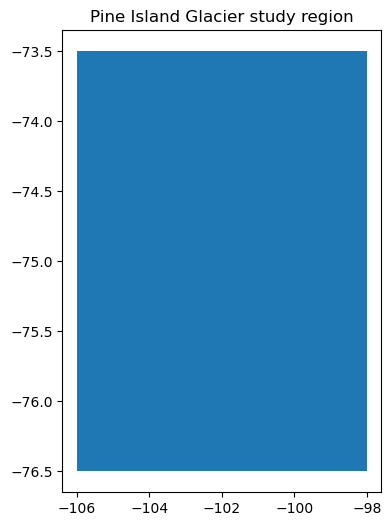

In [13]:
from shapely.geometry import box
import geopandas as gpd

pine_box = box(-106, -76.5, -98, -73.5)

pine_island = gpd.GeoDataFrame(
    {"Name": ["Pine Island Glacier"], "geometry": [pine_box]},
    crs="EPSG:4326"
)

pine_island.plot(figsize=(6,6))
plt.title("Pine Island Glacier study region")
plt.show()

pine_island.to_file("pine_island_region.shp")

                  Name                                           geometry
0  Pine Island Glacier  POLYGON ((-98 -76.5, -106 -76.5, -106 -73.5, -...


<Axes: >

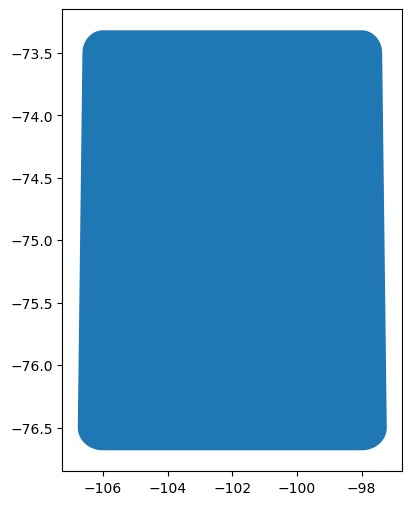

In [14]:
#Verify & buffer the Pine Island region

import geopandas as gpd

pine = gpd.read_file("pine_island_region.shp")
print(pine)

# Reproject to a polar stereographic projection for buffering
pine_ps = pine.to_crs("EPSG:3031")  # Antarctic polar stereographic

# Buffer by 20 km
pine_buf = pine_ps.buffer(20000)

# Convert back to lat/lon
pine_buf = gpd.GeoDataFrame(geometry=pine_buf, crs="EPSG:3031").to_crs("EPSG:4326")

pine_buf.plot(figsize=(6,6))

In [15]:
#Load and visualize the velocity file

import xarray as xr
import matplotlib.pyplot as plt

ds = xr.open_dataset("ASE_ice_velocity_1996-2012_v01.nc")
print(ds)


<xarray.Dataset> Size: 465MB
Dimensions:  (ny: 2268, nx: 1707)
Dimensions without coordinates: ny, nx
Data variables: (12/32)
    vx1996   (ny, nx) float32 15MB ...
    vy1996   (ny, nx) float32 15MB ...
    err1996  (ny, nx) float32 15MB ...
    vx2000   (ny, nx) float32 15MB ...
    vy2000   (ny, nx) float32 15MB ...
    err2000  (ny, nx) float32 15MB ...
    ...       ...
    err2011  (ny, nx) float32 15MB ...
    vx2012   (ny, nx) float32 15MB ...
    vy2012   (ny, nx) float32 15MB ...
    err2012  (ny, nx) float32 15MB ...
    xaxis    (nx) float32 7kB ...
    yaxis    (ny) float32 9kB ...
Attributes: (12/20)
    Title:                ASE Time Series - Ice Velocity
    Version:              1.0.0 (18Oct2013)
    nx:                   1707
    ny:                   2268
    Projection:                    Polar Stereographic South
    Ellipsoid:                      WGS-84
    ...                   ...
    Notes_1:                    The generation of this data set and its scien...


In [16]:
print(ds.data_vars)


Data variables:
    vx1996   (ny, nx) float32 15MB ...
    vy1996   (ny, nx) float32 15MB ...
    err1996  (ny, nx) float32 15MB ...
    vx2000   (ny, nx) float32 15MB ...
    vy2000   (ny, nx) float32 15MB ...
    err2000  (ny, nx) float32 15MB ...
    vx2002   (ny, nx) float32 15MB ...
    vy2002   (ny, nx) float32 15MB ...
    err2002  (ny, nx) float32 15MB ...
    vx2006   (ny, nx) float32 15MB ...
    vy2006   (ny, nx) float32 15MB ...
    err2006  (ny, nx) float32 15MB ...
    vx2007   (ny, nx) float32 15MB ...
    vy2007   (ny, nx) float32 15MB ...
    err2007  (ny, nx) float32 15MB ...
    vx2008   (ny, nx) float32 15MB ...
    vy2008   (ny, nx) float32 15MB ...
    err2008  (ny, nx) float32 15MB ...
    vx2009   (ny, nx) float32 15MB ...
    vy2009   (ny, nx) float32 15MB ...
    err2009  (ny, nx) float32 15MB ...
    vx2010   (ny, nx) float32 15MB ...
    vy2010   (ny, nx) float32 15MB ...
    err2010  (ny, nx) float32 15MB ...
    vx2011   (ny, nx) float32 15MB ...
    vy201

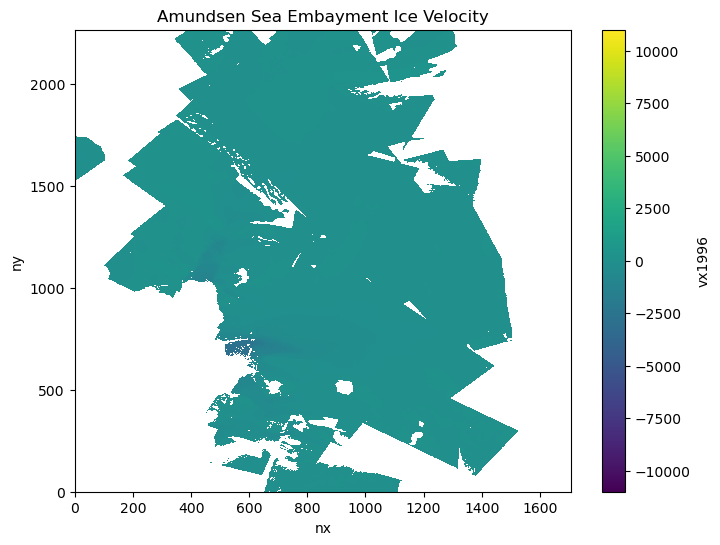

In [17]:
vel = ds[list(ds.data_vars)[0]]  # adjust if needed

plt.figure(figsize=(8,6))
vel.plot(cmap='viridis')
plt.title("Amundsen Sea Embayment Ice Velocity")
plt.show()


Clip velocity to Pine Island region

We’ll extract only your study region so we can:
1. Plot Pine Island alone
2. Compare later with C/L-band deformation
3. Use it as a reference

In [18]:
#Attach coordinates

import xarray as xr

# Attach x/y coordinates
ds = ds.assign_coords(
    x=("nx", ds["xaxis"].values),
    y=("ny", ds["yaxis"].values)
)

In [19]:
#Reproject Pine Island region to match
pine = gpd.read_file("pine_island_region.shp")
pine_ps = pine.to_crs("EPSG:3031")

xmin, ymin, xmax, ymax = pine_ps.total_bounds
print(xmin, ymin, xmax, ymax)


-1787194.1381196836 -497458.70043953543 -1416282.1583887965 -205051.7363276182


In [20]:
#Clip dataset
ds = ds.swap_dims({"nx": "x", "ny": "y"})



In [21]:
print(ds.dims)


FrozenMappingWarningOnValuesAccess({'y': 2268, 'x': 1707})


In [22]:
sub = ds.sel(x=slice(xmin, xmax), y=slice(ymax, ymin))
print(sub)


<xarray.Dataset> Size: 7kB
Dimensions:  (y: 0, x: 824)
Coordinates:
  * y        (y) float32 0B 
  * x        (x) float32 3kB -1.787e+06 -1.787e+06 ... -1.417e+06 -1.417e+06
Data variables: (12/32)
    vx1996   (y, x) float32 0B ...
    vy1996   (y, x) float32 0B ...
    err1996  (y, x) float32 0B ...
    vx2000   (y, x) float32 0B ...
    vy2000   (y, x) float32 0B ...
    err2000  (y, x) float32 0B ...
    ...       ...
    err2011  (y, x) float32 0B ...
    vx2012   (y, x) float32 0B ...
    vy2012   (y, x) float32 0B ...
    err2012  (y, x) float32 0B ...
    xaxis    (x) float32 3kB -1.787e+06 -1.787e+06 ... -1.417e+06 -1.417e+06
    yaxis    (y) float32 0B 
Attributes: (12/20)
    Title:                ASE Time Series - Ice Velocity
    Version:              1.0.0 (18Oct2013)
    nx:                   1707
    ny:                   2268
    Projection:                    Polar Stereographic South
    Ellipsoid:                      WGS-84
    ...                   ...
    Notes_1

Inspection stage

In [23]:
print("x min/max:", ds.x.min().values, ds.x.max().values)
print("y min/max:", ds.y.min().values, ds.y.max().values)


x min/max: -1.8064e+06 -1.0387e+06
y min/max: -793250.0 226900.0


That tells us exactly what’s going on.
Your data grid covers:
x: −1,806,400 → −1,038,700
y: −793,250 → +226,900
Your Pine Island bounds were:
x: −1,787,194 → −1,416,282 ✅ (inside x range)
y: −497,459 → −205,052 ✅ (inside y range)
So the region is inside the grid — good.
Now we need to see the direction of the y-axis, because slicing depends on whether y increases or decreases.

In [24]:
#Check axis order
print("First 5 x:", ds.x.values[:5])
print("Last 5 x:", ds.x.values[-5:])
print("First 5 y:", ds.y.values[:5])
print("Last 5 y:", ds.y.values[-5:])


First 5 x: [-1.80640e+06 -1.80595e+06 -1.80550e+06 -1.80505e+06 -1.80460e+06]
Last 5 x: [-1.04050e+06 -1.04005e+06 -1.03960e+06 -1.03915e+06 -1.03870e+06]
First 5 y: [-793250. -792800. -792350. -791900. -791450.]
Last 5 y: [225100. 225550. 226000. 226450. 226900.]


Interpretation
1. x is ascending (from −1.806e6 → −1.038e6)
2. y is ascending (from −793250 → +226900)
So both axes increase, which means slicing must always be:
1. slice(min, max)
our earlier slice(ymax, ymin) was reversed — that’s why we got an empty subset.

In [25]:
#Clip with correct slice order
sub = ds.sel(x=slice(xmin, xmax), y=slice(ymin, ymax))
print(sub)


<xarray.Dataset> Size: 64MB
Dimensions:  (y: 650, x: 824)
Coordinates:
  * y        (y) float32 3kB -4.972e+05 -4.967e+05 ... -2.056e+05 -2.051e+05
  * x        (x) float32 3kB -1.787e+06 -1.787e+06 ... -1.417e+06 -1.417e+06
Data variables: (12/32)
    vx1996   (y, x) float32 2MB ...
    vy1996   (y, x) float32 2MB ...
    err1996  (y, x) float32 2MB ...
    vx2000   (y, x) float32 2MB ...
    vy2000   (y, x) float32 2MB ...
    err2000  (y, x) float32 2MB ...
    ...       ...
    err2011  (y, x) float32 2MB ...
    vx2012   (y, x) float32 2MB ...
    vy2012   (y, x) float32 2MB ...
    err2012  (y, x) float32 2MB ...
    xaxis    (x) float32 3kB -1.787e+06 -1.787e+06 ... -1.417e+06 -1.417e+06
    yaxis    (y) float32 3kB -4.972e+05 -4.967e+05 ... -2.056e+05 -2.051e+05
Attributes: (12/20)
    Title:                ASE Time Series - Ice Velocity
    Version:              1.0.0 (18Oct2013)
    nx:                   1707
    ny:                   2268
    Projection:                    P

Speed min/max: 0.3544768989086151 4656.697265625


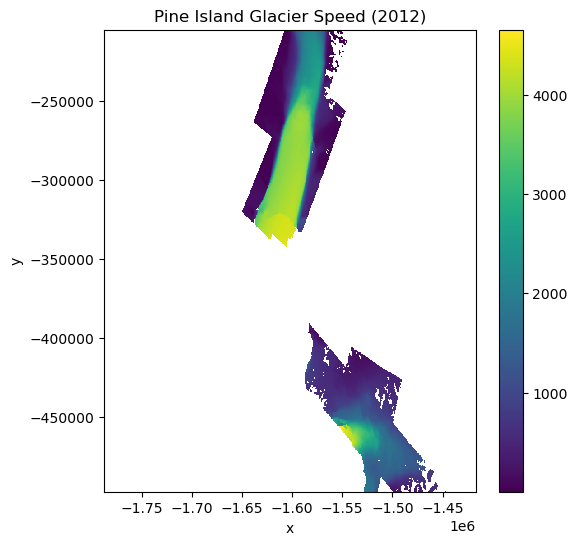

In [26]:
#FIX STEP 4 — Plot Pine Island speed

import numpy as np
import matplotlib.pyplot as plt

vx = sub["vx2012"]
vy = sub["vy2012"]
speed = np.sqrt(vx**2 + vy**2)

print("Speed min/max:", float(speed.min()), float(speed.max()))

plt.figure(figsize=(6,6))
speed.plot()
plt.title("Pine Island Glacier Speed (2012)")
plt.show()


In [2]:
#Load and inspect January 2018 monthly product

import xarray as xr

ds_c = xr.open_dataset("20180101-ESACCI-L3C_AIS-IV-S1-1M_200m-fv1.0.nc")
print(ds_c)


<xarray.Dataset> Size: 23GB
Dimensions:                              (y: 24580, x: 28680, time: 1)
Coordinates:
  * y                                    (y) float64 197kB 2.458e+06 ... -2.4...
  * x                                    (x) float64 229kB -2.868e+06 ... 2.8...
  * time                                 (time) datetime64[ns] 8B 2018-01-01
Data variables:
    crs                                  int32 4B ...
    land_ice_surface_easting_velocity    (y, x) float32 3GB ...
    land_ice_surface_northing_velocity   (y, x) float32 3GB ...
    land_ice_surface_vertical_velocity   (y, x) float32 3GB ...
    land_ice_surface_velocity_magnitude  (y, x) float32 3GB ...
    land_ice_surface_measurement_count   (y, x) float64 6GB ...
    land_ice_surface_easting_stddev      (y, x) float32 3GB ...
    land_ice_surface_northing_stddev     (y, x) float32 3GB ...
Attributes: (12/37)
    title:                     Ice Velocity of the Antarctic Ice Sheet
    institution:               ENVEO IT 

In [3]:
print(ds_c.data_vars)



Data variables:
    crs                                  int32 4B ...
    land_ice_surface_easting_velocity    (y, x) float32 3GB ...
    land_ice_surface_northing_velocity   (y, x) float32 3GB ...
    land_ice_surface_vertical_velocity   (y, x) float32 3GB ...
    land_ice_surface_velocity_magnitude  (y, x) float32 3GB ...
    land_ice_surface_measurement_count   (y, x) float64 6GB ...
    land_ice_surface_easting_stddev      (y, x) float32 3GB ...
    land_ice_surface_northing_stddev     (y, x) float32 3GB ...


In [4]:
#Inspect axis ordering

print("x first:", float(ds_c.x[0]), "x last:", float(ds_c.x[-1]))
print("y first:", float(ds_c.y[0]), "y last:", float(ds_c.y[-1]))


x first: -2867900.0 x last: 2867900.0
y first: 2457900.0 y last: -2457900.0


So:
1. Projection is polar stereographic (EPSG:3031) ✅
2. Coordinates are meters ✅
3. y is descending (north → south) ⚠️ important for slicing
4. Grid clearly covers Pine Island Glacier ✅

In [5]:
#Clip January 2018 Sentinel-1 velocity

import geopandas as gpd

# Load Pine Island region and reproject
pine = gpd.read_file("pine_island_region.shp").to_crs("EPSG:3031")
xmin, ymin, xmax, ymax = pine.total_bounds

print("Bounds:", xmin, ymin, xmax, ymax)

# Correct slicing (note y order!)
sub_c = ds_c.sel(
    x=slice(xmin, xmax),
    y=slice(ymax, ymin)
)

print(sub_c)


Bounds: -1787194.1381196836 -497458.70043953543 -1416282.1583887965 -205051.7363276182
<xarray.Dataset> Size: 87MB
Dimensions:                              (y: 1462, x: 1855, time: 1)
Coordinates:
  * y                                    (y) float64 12kB -2.051e+05 ... -4.9...
  * x                                    (x) float64 15kB -1.787e+06 ... -1.4...
  * time                                 (time) datetime64[ns] 8B 2018-01-01
Data variables:
    crs                                  int32 4B ...
    land_ice_surface_easting_velocity    (y, x) float32 11MB ...
    land_ice_surface_northing_velocity   (y, x) float32 11MB ...
    land_ice_surface_vertical_velocity   (y, x) float32 11MB ...
    land_ice_surface_velocity_magnitude  (y, x) float32 11MB ...
    land_ice_surface_measurement_count   (y, x) float64 22MB ...
    land_ice_surface_easting_stddev      (y, x) float32 11MB ...
    land_ice_surface_northing_stddev     (y, x) float32 11MB ...
Attributes: (12/37)
    title:         

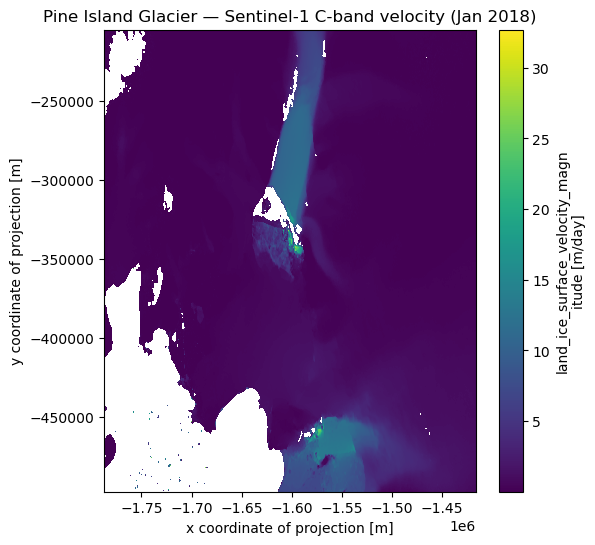

In [6]:
#Plot C-band velocity magnitude

import matplotlib.pyplot as plt

speed_c = sub_c["land_ice_surface_velocity_magnitude"]

plt.figure(figsize=(6,6))
speed_c.plot(cmap="viridis")
plt.title("Pine Island Glacier — Sentinel-1 C-band velocity (Jan 2018)")
plt.show()


“Sentinel-1 C-band velocities show a sharply defined fast-flowing trunk and strong velocity gradients near the grounding line, consistent with surface-dominated ice motion.”

In [7]:
# Load July 2018 Sentinel-1 monthly product
ds_c_jul = xr.open_dataset(
    "20180701-ESACCI-L3C_AIS-IV-S1-1M_200m-fv1.0.nc"
)

# Clip using the same Pine Island bounds
sub_c_jul = ds_c_jul.sel(
    x=slice(xmin, xmax),
    y=slice(ymax, ymin)
)

print(sub_c_jul)


<xarray.Dataset> Size: 87MB
Dimensions:                              (y: 1462, x: 1855, time: 1)
Coordinates:
  * y                                    (y) float64 12kB -2.051e+05 ... -4.9...
  * x                                    (x) float64 15kB -1.787e+06 ... -1.4...
  * time                                 (time) datetime64[ns] 8B 2018-07-01
Data variables:
    crs                                  int32 4B ...
    land_ice_surface_easting_velocity    (y, x) float32 11MB ...
    land_ice_surface_northing_velocity   (y, x) float32 11MB ...
    land_ice_surface_vertical_velocity   (y, x) float32 11MB ...
    land_ice_surface_velocity_magnitude  (y, x) float32 11MB ...
    land_ice_surface_measurement_count   (y, x) float64 22MB ...
    land_ice_surface_easting_stddev      (y, x) float32 11MB ...
    land_ice_surface_northing_stddev     (y, x) float32 11MB ...
Attributes: (12/37)
    title:                     Ice Velocity of the Antarctic Ice Sheet
    institution:               ENVE

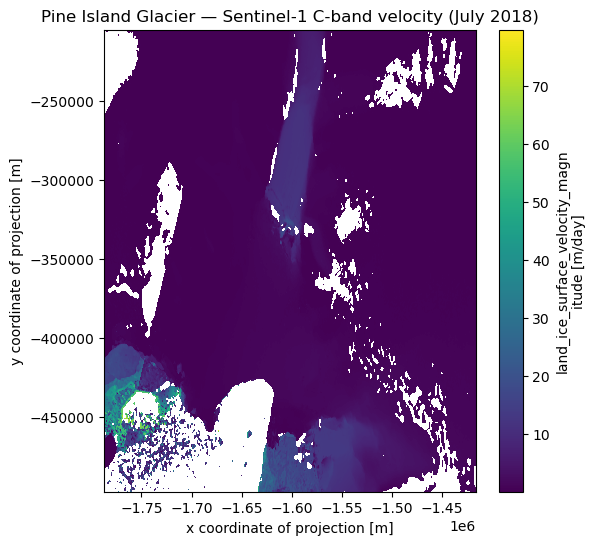

In [8]:
speed_c_jul = sub_c_jul["land_ice_surface_velocity_magnitude"]

plt.figure(figsize=(6,6))
speed_c_jul.plot(cmap="viridis")
plt.title("Pine Island Glacier — Sentinel-1 C-band velocity (July 2018)")
plt.show()


In [9]:
# Load January 2019 Sentinel-1 monthly product
ds_c_jan19 = xr.open_dataset(
    "20190101-ESACCI-L3C_AIS-IV-S1-1M_200m-fv1.0.nc"
)

# Clip
sub_c_jan19 = ds_c_jan19.sel(
    x=slice(xmin, xmax),
    y=slice(ymax, ymin)
)

print(sub_c_jan19)


<xarray.Dataset> Size: 87MB
Dimensions:                              (y: 1462, x: 1855, time: 1)
Coordinates:
  * y                                    (y) float64 12kB -2.051e+05 ... -4.9...
  * x                                    (x) float64 15kB -1.787e+06 ... -1.4...
  * time                                 (time) datetime64[ns] 8B 2019-01-01
Data variables:
    crs                                  int32 4B ...
    land_ice_surface_easting_velocity    (y, x) float32 11MB ...
    land_ice_surface_northing_velocity   (y, x) float32 11MB ...
    land_ice_surface_vertical_velocity   (y, x) float32 11MB ...
    land_ice_surface_velocity_magnitude  (y, x) float32 11MB ...
    land_ice_surface_measurement_count   (y, x) float64 22MB ...
    land_ice_surface_easting_stddev      (y, x) float32 11MB ...
    land_ice_surface_northing_stddev     (y, x) float32 11MB ...
Attributes: (12/37)
    title:                     Ice Velocity of the Antarctic Ice Sheet
    institution:               ENVE

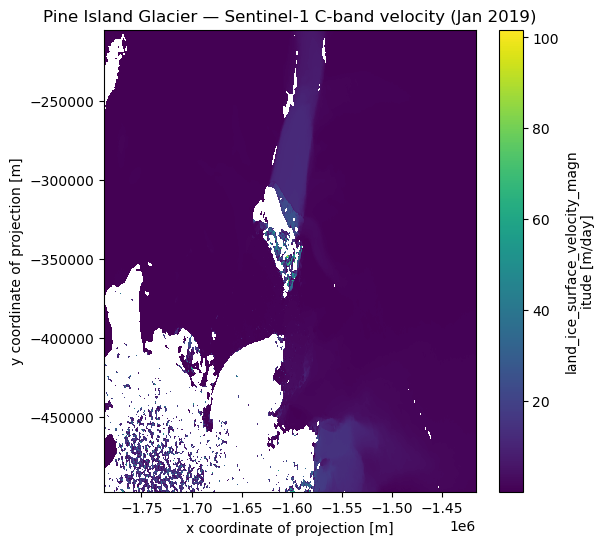

In [10]:
speed_c_jan19 = sub_c_jan19["land_ice_surface_velocity_magnitude"]

plt.figure(figsize=(6,6))
speed_c_jan19.plot(cmap="viridis")
plt.title("Pine Island Glacier — Sentinel-1 C-band velocity (Jan 2019)")
plt.show()


In [27]:
#Prepare MEaSUREs velocity magnitude (single epoch)

import numpy as np

# MEaSUREs subset already clipped earlier
vx_m = sub["vx2012"]
vy_m = sub["vy2012"]

speed_m = np.sqrt(vx_m**2 + vy_m**2)

speed_m.attrs["units"] = "m/yr"
speed_m.attrs["description"] = "MEaSUREs multi-sensor velocity magnitude (2012)"


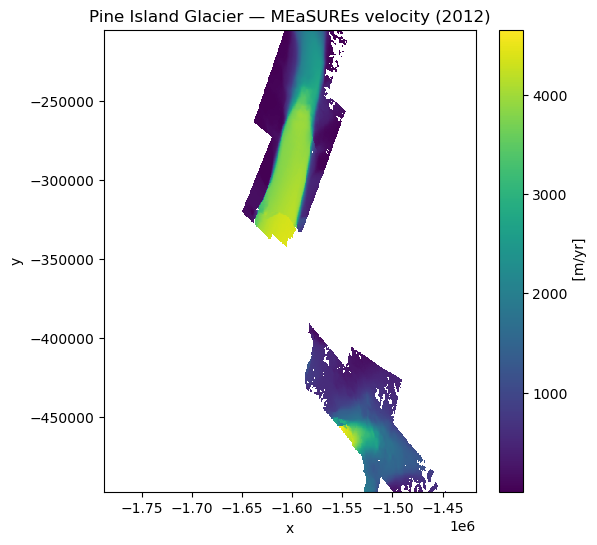

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
speed_m.plot(cmap="viridis")
plt.title("Pine Island Glacier — MEaSUREs velocity (2012)")
plt.show()


Right now:
MEaSUREs grid ≠ Sentinel-1 grid
Different resolution, spacing, and pixel alignment
To compute meaningful differences, we must:
Compare velocities at the same spatial locations

In [29]:
#Regrid MEaSUREs velocity onto Sentinel-1 grid

# Reference Sentinel-1 grid (Jan 2018)
x_ref = sub_c.x
y_ref = sub_c.y


In [30]:
# Interpolate MEaSUREs velocity onto Sentinel-1 grid
speed_m_interp = speed_m.interp(
    x=x_ref,
    y=y_ref,
    method="linear"
)

print(speed_m_interp)


<xarray.DataArray (y: 1462, x: 1855)> Size: 22MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(1462, 1855))
Coordinates:
  * y        (y) float64 12kB -2.051e+05 -2.053e+05 ... -4.971e+05 -4.973e+05
  * x        (x) float64 15kB -1.787e+06 -1.787e+06 ... -1.416e+06 -1.416e+06
Attributes:
    Units:          meter/year
    units:        m/yr
    description:  MEaSUREs multi-sensor velocity magnitude (2012)


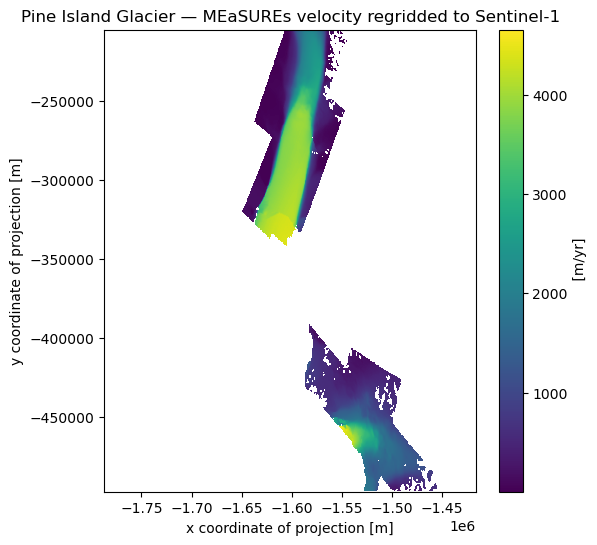

In [31]:
plt.figure(figsize=(6,6))
speed_m_interp.plot(cmap="viridis")
plt.title("Pine Island Glacier — MEaSUREs velocity regridded to Sentinel-1")
plt.show()


In [32]:
# Convert C-band velocity from m/day to m/year
speed_c_yr = speed_c * 365.25
speed_c_yr.attrs["units"] = "m/yr"


In [33]:
# Compute difference where both datasets are valid
delta_v = speed_m_interp - speed_c_yr

delta_v.attrs["units"] = "m/yr"
delta_v.attrs["description"] = "Multi-sensor (incl. L-band) minus C-band velocity"


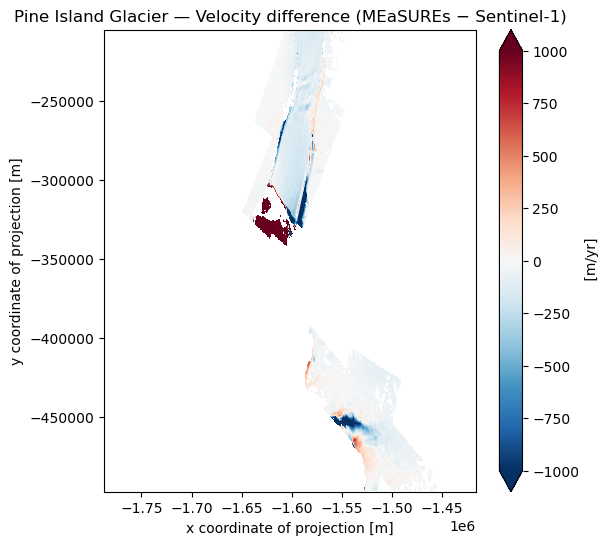

In [34]:
plt.figure(figsize=(6,6))
delta_v.plot(
    cmap="RdBu_r",
    vmin=-1000,
    vmax=1000
)
plt.title("Pine Island Glacier — Velocity difference (MEaSUREs − Sentinel-1)")
plt.show()


In [35]:
# Convert July 2018 Sentinel-1 velocity from m/day to m/year
speed_c_jul_yr = sub_c_jul["land_ice_surface_velocity_magnitude"] * 365.25
speed_c_jul_yr.attrs["units"] = "m/yr"


In [36]:
# Interpolate MEaSUREs velocity to July 2018 Sentinel-1 grid
speed_m_interp_jul = speed_m.interp(
    x=sub_c_jul.x,
    y=sub_c_jul.y,
    method="linear"
)

speed_m_interp_jul.attrs["units"] = "m/yr"


In [37]:
# Difference: multi-sensor minus C-band
delta_v_jul = speed_m_interp_jul - speed_c_jul_yr

delta_v_jul.attrs["units"] = "m/yr"
delta_v_jul.attrs["description"] = "Velocity difference (MEaSUREs − Sentinel-1, July 2018)"


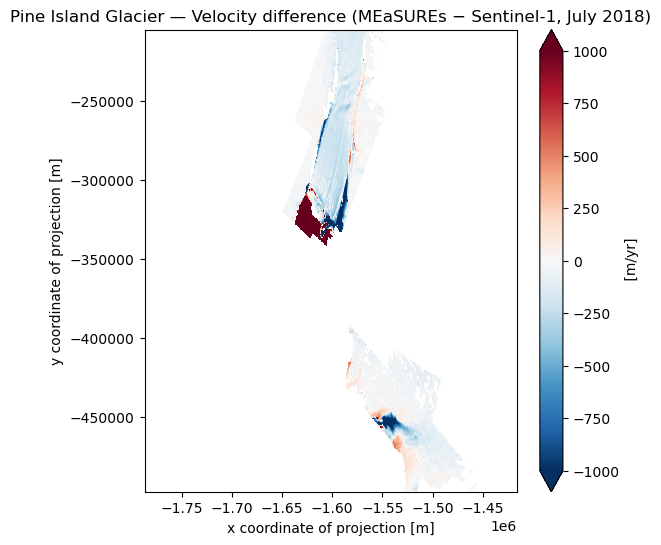

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
delta_v_jul.plot(
    cmap="RdBu_r",
    vmin=-1000,
    vmax=1000
)
plt.title("Pine Island Glacier — Velocity difference (MEaSUREs − Sentinel-1, July 2018)")
plt.show()


In [39]:
#Define a downstream coordinate

import numpy as np

# Use Sentinel-1 January 2018 grid as reference
y_vals = sub_c.y.values

# Sort y from upstream to downstream (north to south)
y_sorted = np.sort(y_vals)[::-1]


Extract centerline profile (Jan 2018)
For each y-row:
1. Find the x-location of maximum C-band velocity
2. Sample Δv at that location

In [40]:
# Δv for January 2018
delta_jan18 = delta_v

profile_jan18 = []

for y in y_sorted:
    row = speed_c_yr.sel(y=y)
    if np.all(np.isnan(row)):
        profile_jan18.append(np.nan)
        continue

    x_max = row.x[row.argmax(dim="x")]
    dv_val = delta_jan18.sel(y=y, x=x_max)
    profile_jan18.append(float(dv_val))

profile_jan18 = np.array(profile_jan18)


In [41]:
delta_jul18 = delta_v_jul

profile_jul18 = []

for y in y_sorted:
    row = speed_c_jul_yr.sel(y=y)
    if np.all(np.isnan(row)):
        profile_jul18.append(np.nan)
        continue

    x_max = row.x[row.argmax(dim="x")]
    dv_val = delta_jul18.sel(y=y, x=x_max)
    profile_jul18.append(float(dv_val))

profile_jul18 = np.array(profile_jul18)


In [42]:
# Prepare Jan 2019 velocity (m/yr)
speed_c_jan19_yr = sub_c_jan19["land_ice_surface_velocity_magnitude"] * 365.25

# Interpolate MEaSUREs to Jan 2019 grid
speed_m_interp_jan19 = speed_m.interp(
    x=sub_c_jan19.x,
    y=sub_c_jan19.y,
    method="linear"
)

delta_jan19 = speed_m_interp_jan19 - speed_c_jan19_yr

profile_jan19 = []

for y in y_sorted:
    row = speed_c_jan19_yr.sel(y=y)
    if np.all(np.isnan(row)):
        profile_jan19.append(np.nan)
        continue

    x_max = row.x[row.argmax(dim="x")]
    dv_val = delta_jan19.sel(y=y, x=x_max)
    profile_jan19.append(float(dv_val))

profile_jan19 = np.array(profile_jan19)


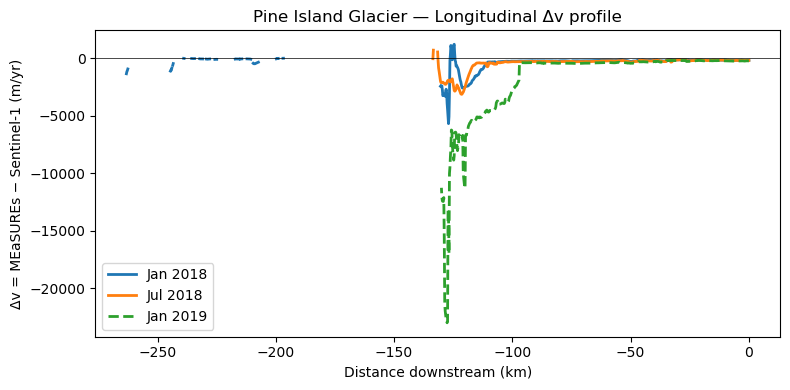

In [43]:
#plot longitudinal profiles

import matplotlib.pyplot as plt

# Convert y to distance (km, relative)
distance_km = (y_sorted - y_sorted[0]) / 1000

plt.figure(figsize=(8,4))
plt.plot(distance_km, profile_jan18, label="Jan 2018", lw=2)
plt.plot(distance_km, profile_jul18, label="Jul 2018", lw=2)
plt.plot(distance_km, profile_jan19, label="Jan 2019", lw=2, ls="--")

plt.axhline(0, color="k", lw=0.5)
plt.xlabel("Distance downstream (km)")
plt.ylabel("Δv = MEaSUREs − Sentinel-1 (m/yr)")
plt.legend()
plt.title("Pine Island Glacier — Longitudinal Δv profile")
plt.tight_layout()
plt.show()


Recompute longitudinal Δv profiles with physical masking
🎯 What we are enforcing (explicitly)
We apply two constraints:
Trunk-only sampling
Sentinel-1 speed must be > 500 m/yr
Physically plausible Δv range

In [44]:
V_MIN = 500.0      # m/yr, minimum trunk speed
DV_MAX = 3000.0   # m/yr, max absolute difference


In [45]:
#Masked profile extraction (function)

import numpy as np

def extract_masked_profile(speed_c_yr, delta_v, y_sorted):
    profile = []

    for y in y_sorted:
        row_speed = speed_c_yr.sel(y=y)
        row_dv = delta_v.sel(y=y)

        # Mask slow ice
        valid = row_speed > V_MIN

        if valid.sum() == 0:
            profile.append(np.nan)
            continue

        # Find trunk center (max speed among valid pixels)
        x_max = row_speed.where(valid).argmax(dim="x")
        dv_val = row_dv.isel(x=x_max)

        # Clip to physical range
        if np.isnan(dv_val):
            profile.append(np.nan)
        else:
            dv_val = float(dv_val)
            dv_val = np.clip(dv_val, -DV_MAX, DV_MAX)
            profile.append(dv_val)

    return np.array(profile)


In [46]:
profile_jan18_f = extract_masked_profile(speed_c_yr, delta_v, y_sorted)
profile_jul18_f = extract_masked_profile(speed_c_jul_yr, delta_v_jul, y_sorted)
profile_jan19_f = extract_masked_profile(speed_c_jan19_yr, delta_jan19, y_sorted)


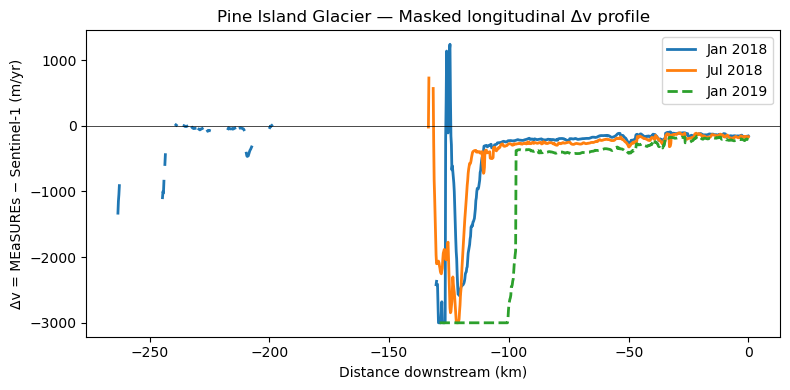

In [47]:
distance_km = (y_sorted - y_sorted[0]) / 1000

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(distance_km, profile_jan18_f, label="Jan 2018", lw=2)
plt.plot(distance_km, profile_jul18_f, label="Jul 2018", lw=2)
plt.plot(distance_km, profile_jan19_f, label="Jan 2019", lw=2, ls="--")

plt.axhline(0, color="k", lw=0.5)
plt.xlabel("Distance downstream (km)")
plt.ylabel("Δv = MEaSUREs − Sentinel-1 (m/yr)")
plt.title("Pine Island Glacier — Masked longitudinal Δv profile")
plt.legend()
plt.tight_layout()
plt.show()


In [48]:
#Load and clip annual Sentinel-1 velocity

# Load annual Sentinel-1 velocity (2021–2022)
ds_c_ann = xr.open_dataset(
    "C3S_AIS_IV_200m_S1_20210401_20220331_v1_5.nc"
)

print(ds_c_ann)


<xarray.Dataset> Size: 23GB
Dimensions:                              (y: 24580, x: 28680)
Coordinates:
  * y                                    (y) float64 197kB 2.458e+06 ... -2.4...
  * x                                    (x) float64 229kB -2.868e+06 ... 2.8...
Data variables:
    crs                                  int32 4B ...
    land_ice_surface_easting_velocity    (y, x) float32 3GB ...
    land_ice_surface_northing_velocity   (y, x) float32 3GB ...
    land_ice_surface_vertical_velocity   (y, x) float32 3GB ...
    land_ice_surface_velocity_magnitude  (y, x) float32 3GB ...
    land_ice_surface_measurement_count   (y, x) float64 6GB ...
    land_ice_surface_easting_stddev      (y, x) float32 3GB ...
    land_ice_surface_northing_stddev     (y, x) float32 3GB ...
Attributes: (12/13)
    Conventions:    CF-1.7
    title:          Ice Velocity of the Antarctic Ice Sheet
    reference:      Main: Nagler, T.; Rott, H.; Hetzenecker, M.; Wuite, J.; P...
    source:         Copernicu

In [49]:
#Clip to Pine Island

sub_c_ann = ds_c_ann.sel(
    x=slice(xmin, xmax),
    y=slice(ymax, ymin)
)

print(sub_c_ann)


<xarray.Dataset> Size: 87MB
Dimensions:                              (y: 1462, x: 1855)
Coordinates:
  * y                                    (y) float64 12kB -2.051e+05 ... -4.9...
  * x                                    (x) float64 15kB -1.787e+06 ... -1.4...
Data variables:
    crs                                  int32 4B ...
    land_ice_surface_easting_velocity    (y, x) float32 11MB ...
    land_ice_surface_northing_velocity   (y, x) float32 11MB ...
    land_ice_surface_vertical_velocity   (y, x) float32 11MB ...
    land_ice_surface_velocity_magnitude  (y, x) float32 11MB ...
    land_ice_surface_measurement_count   (y, x) float64 22MB ...
    land_ice_surface_easting_stddev      (y, x) float32 11MB ...
    land_ice_surface_northing_stddev     (y, x) float32 11MB ...
Attributes: (12/13)
    Conventions:    CF-1.7
    title:          Ice Velocity of the Antarctic Ice Sheet
    reference:      Main: Nagler, T.; Rott, H.; Hetzenecker, M.; Wuite, J.; P...
    source:         Cope

In [50]:
#Prepare annual Sentinel-1 velocity (m/yr)

speed_c_ann = sub_c_ann["land_ice_surface_velocity_magnitude"]
speed_c_ann.attrs["units"] = "m/yr"


In [51]:
#Interpolate MEaSUREs to annual Sentinel-1 grid

speed_m_interp_ann = speed_m.interp(
    x=sub_c_ann.x,
    y=sub_c_ann.y,
    method="linear"
)


In [52]:
#Compute annual Δv

delta_v_ann = speed_m_interp_ann - speed_c_ann
delta_v_ann.attrs["units"] = "m/yr"


In [53]:
#Extract masked longitudinal profile

profile_ann = extract_masked_profile(
    speed_c_ann,
    delta_v_ann,
    y_sorted
)


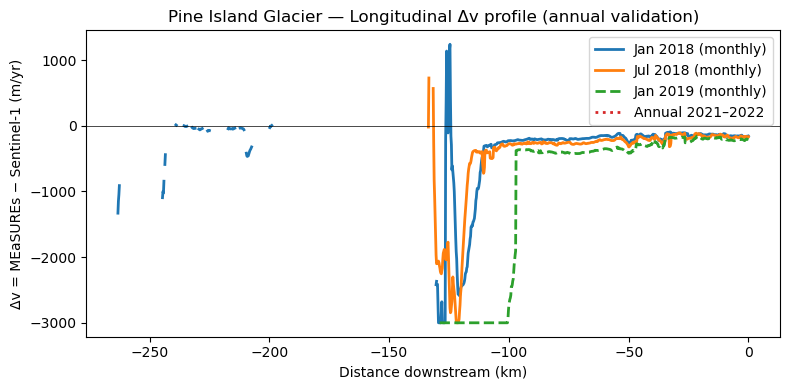

In [54]:
#Plot validation profile together with others

plt.figure(figsize=(8,4))

plt.plot(distance_km, profile_jan18_f, label="Jan 2018 (monthly)", lw=2)
plt.plot(distance_km, profile_jul18_f, label="Jul 2018 (monthly)", lw=2)
plt.plot(distance_km, profile_jan19_f, label="Jan 2019 (monthly)", lw=2, ls="--")
plt.plot(distance_km, profile_ann, label="Annual 2021–2022", lw=2, ls=":")

plt.axhline(0, color="k", lw=0.5)
plt.xlabel("Distance downstream (km)")
plt.ylabel("Δv = MEaSUREs − Sentinel-1 (m/yr)")
plt.title("Pine Island Glacier — Longitudinal Δv profile (annual validation)")
plt.legend()
plt.tight_layout()
plt.show()


In [56]:
# Build mask where all profiles are valid
valid_mask = (
    ~np.isnan(profile_jan18_f) &
    ~np.isnan(profile_jul18_f) &
    ~np.isnan(profile_jan19_f) &
    ~np.isnan(profile_ann)
)


In [58]:
# Demean annual profile using its own valid values only
profile_ann_demean = profile_ann - np.nanmedian(profile_ann)

/var/folders/w8/g8q_m5x10778lnbvbgj_mhtm0000gn/T/ipykernel_7833/4021307901.py:2: RuntimeWarning: All-NaN slice encountered
  profile_ann_demean = profile_ann - np.nanmedian(profile_ann)
